In [48]:
import os
import pickle
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option('display.max_colwidth', int(1e3))

sns.set_palette(sns.color_palette("hls", 8))

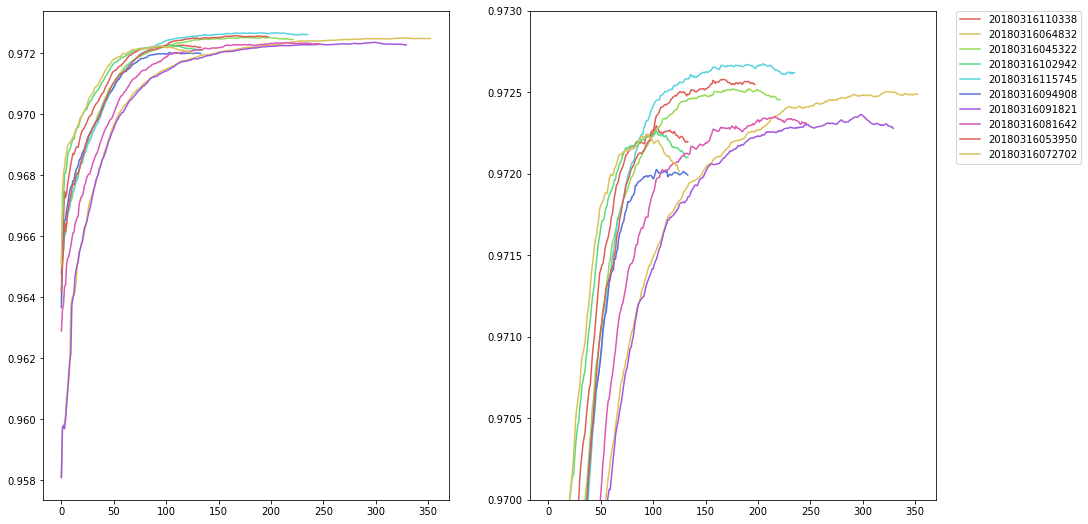

In [45]:
summary = []

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.rcParams["figure.figsize"] = [16,9]
plt.ylim((0.970, 0.973))


for fname in glob.glob('cv-*pkl'):
    base_fname, _ = os.path.splitext(fname)
    _, _, eid = base_fname.split('-')
    with open(fname, 'rb') as f:
        m, evals_result, params = pickle.load(f)
    best_iter = m.best_iteration
    best_auc = evals_result['valid']['auc'][best_iter]
    summary.append([eid, best_auc, params])
    axes[0].plot(evals_result['valid']['auc'], label=eid)
    axes[1].plot(evals_result['valid']['auc'], label=eid)
    
summary = pd.DataFrame(summary, columns=['eid', 'auc', 'params'])    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#axes[1].ylim((0.970, 0.973))


In [46]:
plt.show()

In [49]:
summary.sort_values(by='auc',ascending=False)

,eid,auc,params
4,20180316115745,0.972668,"{'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"
8,20180316053950,0.972576,"{'bagging_fraction': 0.7000000000000001, 'bagging_freq': 2, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"
2,20180316045322,0.972518,"{'bagging_fraction': 1.0, 'bagging_freq': 4, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"
1,20180316064832,0.972502,"{'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 300, 'num_leaves': 32}"
6,20180316091821,0.972354,"{'bagging_fraction': 0.7000000000000001, 'bagging_freq': 4, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 300, 'num_leaves': 32}"
7,20180316081642,0.972344,"{'bagging_fraction': 0.5, 'bagging_freq': 2, 'feature_fraction': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 6, 'scale_pos_weight': 300, 'num_leaves': 64}"
0,20180316110338,0.972284,"{'bagging_fraction': 0.6000000000000001, 'bagging_freq': 3, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'scale_pos_weight': 300, 'num_leaves': 256}"
3,20180316102942,0.972254,"{'bagging_fraction': 0.9, 'bagging_freq': 3, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'scale_pos_weight': 300, 'num_leaves': 512}"
9,20180316072702,0.972229,"{'bagging_fraction': 0.9, 'bagging_freq': 3, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 9, 'scale_pos_weight': 300, 'num_leaves': 512}"
5,20180316094908,0.972020,"{'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"


In [25]:
plt.show()